   position         team    points       won      lost      draw    played  \
0         1    Barcelona  3.635700  3.490302 -2.506065 -0.822549  0.777873   
1         2  Real Madrid  3.370796  3.281700 -2.061375 -1.126993  0.777873   
2         3     Valencia  1.980049  1.612890 -0.949652 -0.213661  0.777873   
3         4   Villarreal  1.384015  0.987086 -0.282619 -0.213661  0.777873   
4         5      Sevilla  1.119110  0.778485  0.162070 -0.518105  0.777873   

   goals_for  goals_against  goal_difference     year  
0   3.025203      -2.132365         0.232297  2010-11  
1   3.473082      -1.174658         0.209008  2010-11  
2   1.041742      -0.296759         0.057843  2010-11  
3   0.401915      -0.296759         0.028615  2010-11  
4   0.913776       1.059993        -0.009979  2010-11  
(240, 11)
position             int64
team                object
points             float64
won                float64
lost               float64
draw               float64
played             floa

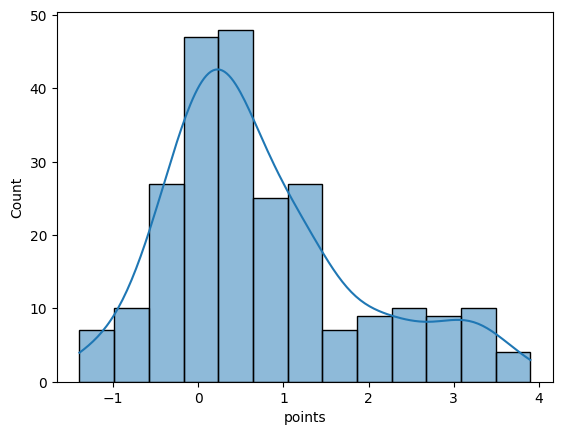

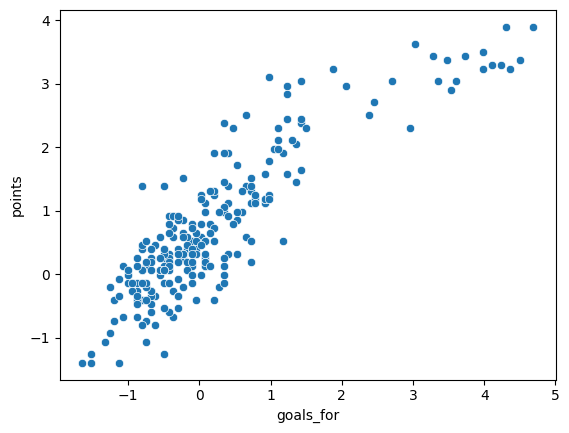

C:\Users\Sneha\AppData\Local\Temp\ipykernel_43284\2668962261.py:47: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')


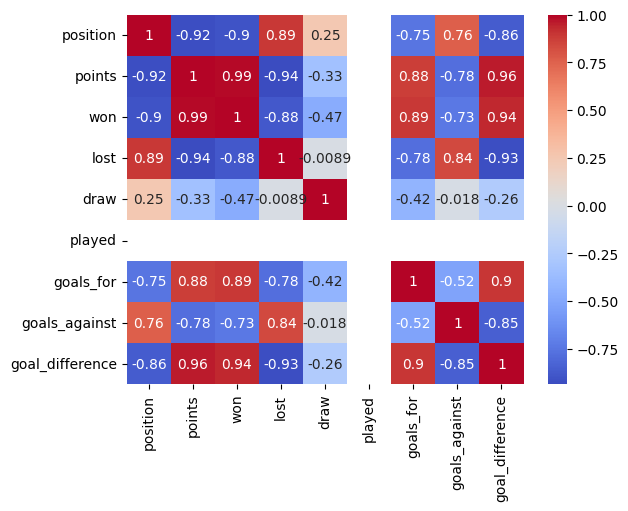

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
arr=[]
year1=2010
year2=2011
while(year1!=2022):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./normalized_data/"+string+"_normalized.csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
     
data= la_liga[['position', 'team', 'points', 'won', 'lost', 'draw', 'played', 'goals_for', 'goal_difference']]
print(la_liga.head())


print(la_liga.shape)


print(la_liga.dtypes)


print(la_liga.isnull().sum())


print(la_liga.describe())


sns.histplot(la_liga['points'], kde=True)
plt.show()


sns.scatterplot(x='goals_for', y='points', data=la_liga)
plt.show()

sns.heatmap(la_liga.corr(), annot=True, cmap='coolwarm')
plt.show()


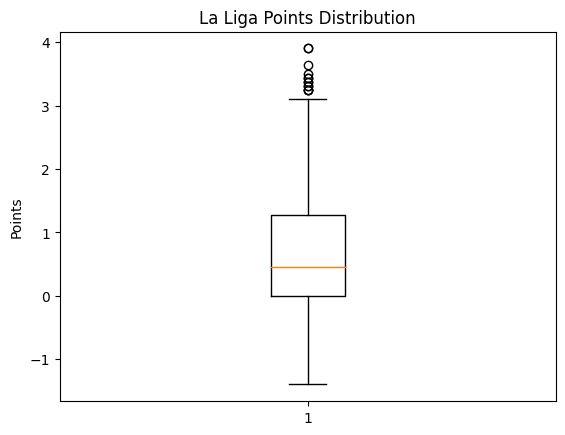

Outliers:
   position             team    points       won      lost      draw  \
0         1        Barcelona  3.635700  3.490302 -2.506065 -0.822549   
1         2      Real Madrid  3.370796  3.281700 -2.061375 -1.126993   
0         1      Real Madrid  3.900604  3.907504 -2.506065 -1.431437   
1         2        Barcelona  3.304570  3.073099 -2.283720 -0.518105   
0         1        Barcelona  3.900604  3.907504 -2.506065 -1.431437   
0         1  Atlético Madrid  3.238344  3.073099 -2.061375 -0.822549   
0         1        Barcelona  3.503248  3.490302 -2.061375 -1.431437   
1         2      Real Madrid  3.370796  3.490302 -1.616686 -2.040326   
0         1        Barcelona  3.304570  3.281700 -1.839031 -1.431437   
1         2      Real Madrid  3.238344  3.073099 -2.061375 -0.822549   
0         1      Real Madrid  3.437022  3.281700 -2.283720 -0.822549   
1         2        Barcelona  3.238344  3.073099 -2.061375 -0.822549   
0         1        Barcelona  3.437022  3.073099 -2.72

In [8]:
plt.boxplot(la_liga['points'])


plt.title('La Liga Points Distribution')
plt.ylabel('Points')


plt.show()


q1 = la_liga['points'].quantile(0.25)
q3 = la_liga['points'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr

outliers = la_liga[(la_liga['points'] > upper_bound) | (la_liga['points'] < lower_bound)]
print('Outliers:')
print(outliers)

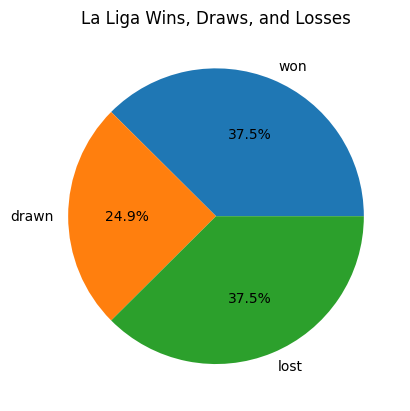

In [9]:
arr=[]
year1=2010
year2=2011
while(year1!=2022):
    string=str(year1)+"-"+str(year2)[2:]
    final_string="./orig_data/laliga_points_table_"+string+".csv"
    arr.append(final_string)
    year1=year1+1
    year2=year2+1
data_frames = []
for file_name in arr:
    data = pd.read_csv(file_name)
    data_frames.append(data)
la_liga = pd.concat(data_frames)




     
data= la_liga[['position', 'team', 'played', 'won', 'drawn', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]

wins = la_liga['won'].sum()
draws = la_liga['drawn'].sum()
losses = la_liga['lost'].sum()

values = [wins, draws, losses]
labels = ['won', 'drawn', 'lost']


plt.pie(values, labels=labels, autopct='%1.1f%%')


plt.title('La Liga Wins, Draws, and Losses')


plt.show()